In [1]:
import numpy as np
import matplotlib.pyplot as plt
from canteen_simulation import CanteenSimulation
from canteen_analysis import *

20 variant. About canteen.

In [2]:
def simulate(X, mu, q, t, test_time=100000):
    canteen = CanteenSimulation.simulate_canteen(X, mu, q, t, test_time)
    empirical_characteristics = calculate_empirical_characteristics(canteen)
    theoretical_characteristics = calculate_theoretical_characteristics(X, mu, q, t)
    return canteen, theoretical_characteristics, empirical_characteristics

def test_analyse(X, mu, q, t, test_time=10000):
    canteen, theoretical_characteristics, empirical_characteristics = simulate(X, mu, q, t, test_time)

    print(f'Характеристики СМО столовой: Количество касс n={1},\n',
          f'Интенсивность потока посетителей X={X},\n',
          f'Интенсивность отпуска блюд mu={mu},\n',
          f'Вероятность того, что посетитель возьмет 2 блюда вместо 1-го q={q},\n',
          f'Среднее время съедения 1-го блюда t={t},\n')
    display_characteristics(theoretical_characteristics, empirical_characteristics)

    has_static_state = canteen_has_static_state(canteen.X, canteen.mu, canteen.q)
    print(f'\n1. Столовая {"" if has_static_state else "не "}имеет устойчиый стационарный режим работы')

    if has_static_state:
        t_estimation_list = theoretical_characteristics[0] + [
            theoretical_characteristics[i] for i in range(1, len(theoretical_characteristics))
        ]
        e_estimation_list = empirical_characteristics[0] + [
            empirical_characteristics[i] for i in range(1, len(empirical_characteristics))
        ]
        xi_2_estimation = get_xi_2(e_estimation_list, t_estimation_list)
        print('Xi-квадрат:', xi_2_estimation)

    plot_graphs(theoretical_characteristics, empirical_characteristics)

Характеристики СМО столовой: Количество касс n=1,
 Интенсивность потока посетителей X=2,
 Интенсивность отпуска блюд mu=5,
 Вероятность того, что посетитель возьмет 2 блюда вместо 1-го q=0.0,
 Среднее время съедения 1-го блюда t=1,

                                                   Теоретические характеристики    Эмпирические характеристики
-----------------------------------------------  ------------------------------  -----------------------------
p0                                                                   0.13272                        0.113626
p1                                                                   0.236948                       0.20387
p2                                                                   0.206296                       0.219989
p3                                                                   0.150157                       0.174718
p4                                                                   0.101088                       0.120293
p

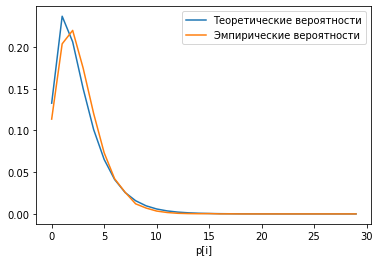

In [3]:
test_analyse(X = 2, mu = 5, q = 0.0, t = 1)

Характеристики СМО столовой: Количество касс n=1,
 Интенсивность потока посетителей X=1,
 Интенсивность отпуска блюд mu=6,
 Вероятность того, что посетитель возьмет 2 блюда вместо 1-го q=1,
 Среднее время съедения 1-го блюда t=1,

                                                   Теоретические характеристики    Эмпирические характеристики
-----------------------------------------------  ------------------------------  -----------------------------
p0                                                                    0.147466                      0.122074
p1                                                                    0.253445                      0.224957
p2                                                                    0.208389                      0.241435
p3                                                                    0.144617                      0.186175
p4                                                                    0.0937888                     0.10861
p5 

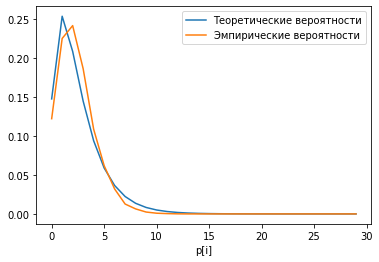

In [6]:
test_analyse(X = 1, mu = 6, q = 1, t = 1)

Характеристики СМО столовой: Количество касс n=1,
 Интенсивность потока посетителей X=2,
 Интенсивность отпуска блюд mu=1,
 Вероятность того, что посетитель возьмет 2 блюда вместо 1-го q=0.4,
 Среднее время съедения 1-го блюда t=1,

                                                   Теоретические характеристики    Эмпирические характеристики
-----------------------------------------------  ------------------------------  -----------------------------
p0                                                                            0                    0.000140233
p1                                                                            0                    0.000140233
p2                                                                            0                    0.000140233
p3                                                                            0                    0.000140233
p4                                                                            0                    0.

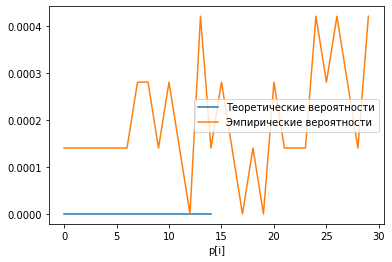

In [5]:
test_analyse(X = 2, mu = 1, q = 0.4, t = 1)